In [1]:
! wget 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'

--2024-06-23 22:23:52--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.36.245.101, 2a02:26f0:1180:382::317f, 2a02:26f0:1180:39e::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.36.245.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   171MB/s    in 4.7s    

2024-06-23 22:23:57 (167 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [2]:
! unzip kagglecatsanddogs_5340.zip

Archive:  kagglecatsanddogs_5340.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  inf

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(3)
import pickle as pk
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense,MaxPooling2D,Conv2D

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
directory = r'PetImages'
categories = ['Cat','Dog']

In [5]:
# Load all the dataset images in a list
data = []
img_size = 100

for category in categories:
    folder = os.path.join(directory,category)
    label = categories.index(category)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        image = cv2.imread(img_path)
        # Check if the image was successfully loaded
        if image is not None:
            image = cv2.resize(image, (img_size, img_size))
            data.append([image,label])

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


In [6]:
# Shuffle data to diverse it in the training and testing data
random.shuffle(data)

In [7]:
# Find two indices, one for masked image and one for not
twoindices = []
has = False
nothave = False
index = 0
for feature, label in data:
    if has == False and label == 0:
        twoindices.append(index)
        has = True
    elif nothave == False and label == 1:
        twoindices.append(index)
        nothave = True
    if has == True and nothave == True:
        break
    index += 1

Cat


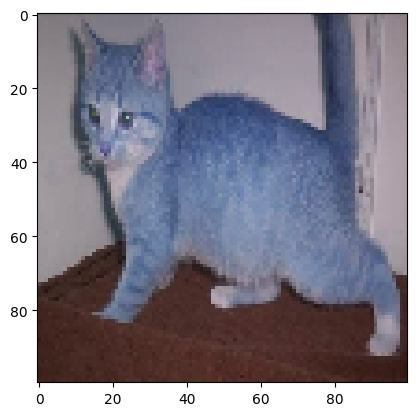

Dog


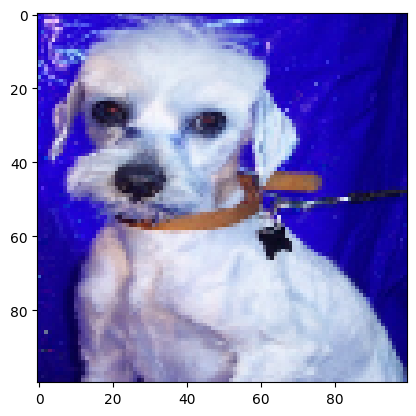

In [8]:
# Show tow images, one with mask and another without
for index in twoindices:
    print('Dog' if data[index][1] == 1 else 'Cat')
    plt.imshow(data[index][0])
    plt.show()

In [9]:
X = []
Y = []
for feature,label in data:
    X.append(feature)
    Y.append(label)

In [10]:
# Convert input and label data into numpy array
Y = np.array(Y)
X = np.array(X)
# Scale train data 
X = X/255
print(X.shape)
print(Y.shape)

(24946, 100, 100, 3)
(24946,)


In [11]:
# Split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size = 0.8, random_state = 42)
print(X.shape, x_train.shape, x_test.shape)
print(Y.shape, y_train.shape, y_test.shape)

(24946, 100, 100, 3) (19956, 100, 100, 3) (4990, 100, 100, 3)
(24946,) (19956,) (4990,)


In [12]:
# Define the input shape of the images
input_shape = (100, 100, 3)
# Define the number of classes
num_classes = 2
# Define the model architecture
Model = Sequential([
    Input(shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(2, activation="sigmoid")
])

In [13]:
# Compile the model
Model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
result = Model.fit(X,Y, epochs=8,validation_split=0.05)

Epoch 1/8
741/741 [==============================] - 11s 9ms/step - loss: 0.6530 - accuracy: 0.6160 - val_loss: 0.5792 - val_accuracy: 0.7003
Epoch 2/8
741/741 [==============================] - 6s 9ms/step - loss: 0.5521 - accuracy: 0.7199 - val_loss: 0.5592 - val_accuracy: 0.7236
Epoch 3/8
741/741 [==============================] - 6s 8ms/step - loss: 0.5087 - accuracy: 0.7523 - val_loss: 0.5320 - val_accuracy: 0.7332
Epoch 4/8
741/741 [==============================] - 6s 8ms/step - loss: 0.4654 - accuracy: 0.7795 - val_loss: 0.4878 - val_accuracy: 0.7556
Epoch 5/8
741/741 [==============================] - 6s 8ms/step - loss: 0.4355 - accuracy: 0.7982 - val_loss: 0.4572 - val_accuracy: 0.7845
Epoch 6/8
741/741 [==============================] - 6s 8ms/step - loss: 0.4191 - accuracy: 0.8096 - val_loss: 0.4381 - val_accuracy: 0.8045
Epoch 7/8
741/741 [==============================] - 6s 8ms/step - loss: 0.3961 - accuracy: 0.8229 - val_loss: 0.4416 - val_accuracy: 0.8013
Epoch 8/8
74

In [15]:
# Avaluate the model
evaluation = Model.evaluate(X,Y)
print("the loss value is: ",evaluation[0])
print("the accracy value is: ",evaluation[1])

780/780 [==============================] - 3s 4ms/step - loss: 0.3665 - accuracy: 0.8449
the loss value is:  0.366470605134964
the accracy value is:  0.8449050188064575


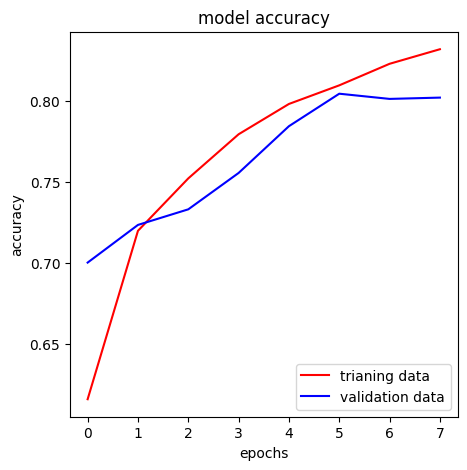

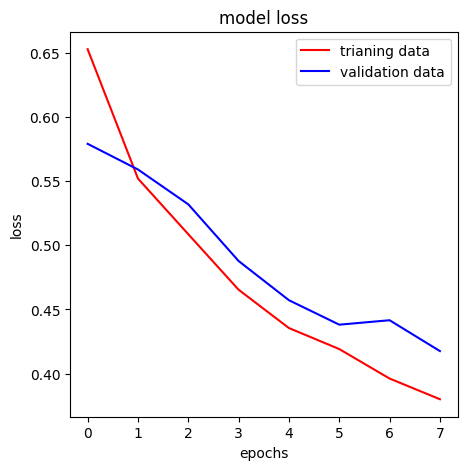

In [16]:
plt.figure(figsize=(5,5))
plt.plot(result.history['accuracy'],color='red')
plt.plot(result.history['val_accuracy'],color='blue')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["trianing data","validation data"],loc="lower right")
plt.show()
plt.figure(figsize=(5,5))
plt.plot(result.history['loss'],color='red')
plt.plot(result.history['val_loss'],color='blue')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["trianing data","validation data"],loc="upper right")
plt.show()

In [17]:
# Make a predictive system
def classify(image_path):
    input_image = cv2.imread(image_path)
    # Ensure the image has 3 color channels (e.g., convert from grayscale to RGB)
    if input_image.shape[-1] == 1:
        input_image = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)

    # Resize the image into 100x100
    img_size = 100
    resized_image = cv2.resize(input_image, (img_size, img_size))

    # Normalize the image by scaling it
    resized_image = resized_image / 255

    # Make the model predict what is in the image
    prediction = Model.predict(np.expand_dims(resized_image, axis=0))
    predicted_class = np.argmax(prediction)

    return f"Predicted class: {predicted_class}"

In [18]:
# Try to predict on two images, cat(0) and Dog(1)
print(classify('/kaggle/working/PetImages/Cat/12316.jpg'))
print(classify('/kaggle/working/PetImages/Dog/12317.jpg'))

1/1 [==============================] - 0s 197ms/step
Predicted class: 0
1/1 [==============================] - 0s 19ms/step
Predicted class: 1


## Save Model

In [19]:
# Define the path to save the model
model_path = 'Preparing_model/my_cat_dog_classifier.pkl'

# Check if the model file already exists
if not os.path.exists(model_path):
    # Save the model using pickle
    with open(model_path, 'wb') as file:
        pk.dump(Model, file)
    print(f"Model has been saved to '{model_path}'")
else:
    print(f"The file '{model_path}' already exists. No action taken.")

Model has been saved to 'Preparing_model/my_cat_dog_classifier.pkl'
